In [2]:
import numpy, pandas, matplotlib, yfinance, scipy
print("Libraries imported successfully!")

Libraries imported successfully!


#Day 1: Numpy and sciPy Basics
Initial quant finance tasks: random matrix with NumPy, normal distribution fit with SciPy

Matrix Mean: 0.501486, Std Dev: 0.290163


Matplotlib is building the font cache; this may take a moment.


Fitted Mean: 0.027680, Fitted Std Dev: 0.992032


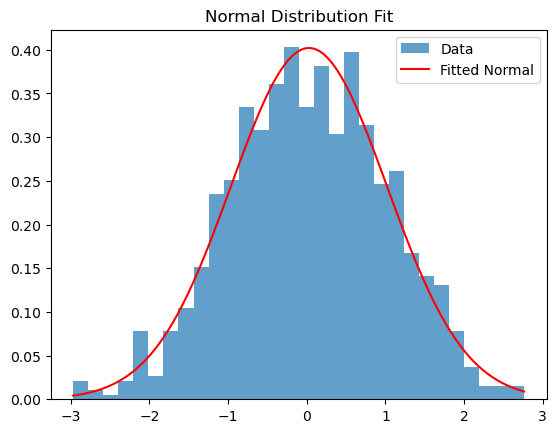

In [4]:
import numpy as np
matrix = np.random.rand(50, 50) # 50x50 matrix, valurs in [0,1)
mean = np.mean(matrix)
std_dev = np.std(matrix)
print(f"Matrix Mean: {mean:.6f}, Std Dev: {std_dev:6f}")

from scipy import stats
import matplotlib.pyplot as plt
data = stats.norm. rvs(loc=0, scale=1, size=1000) # 1000 samples, N(0,1)
mu, sigma = stats.norm.fit(data) # Fit normal distribution
print(f"Fitted Mean: {mu:.6f}, Fitted Std Dev: {sigma:.6f}")
plt.hist(data, bins=30, density =True, alpha=0.7, label="Data")
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("Normal Distribution Fit")
plt.legend()
plt.show()


# Random Variables Notes
- Random variable: Represents random process outcomes (e.g., coin toss result).
- Discrete: Countable values (e.g., 0 or 1).
- Continuous: Range of values (e.g., stock returns).
- Expected value: Probability-weighted average e.g., coin toss (0.5*0 + 0.5*1 = 0.5)

In [5]:
from scipy import stats
import numpy as np
coin_tosses = stats.bernoulli.rvs(p=0.5, size=1000) # 1000 coin tosses
mean_tosses = np.mean(coin_tosses)
print(f"Simulated Coin Toss Mean: {mean_tosses:.6f}") # ~0.5

Simulated Coin Toss Mean: 0.511000


"#Random Variables: Expected Value".


# Day 2: AAPL Stock Analysis
Analysing AAPL stock data with pandas, yfinanace, and SciPy

AAPL Mean Daily Return: 0.000115, Std Dev: 0.019965
Fitted Normal - Mean: 0.000115, Std Dev: 0.019925


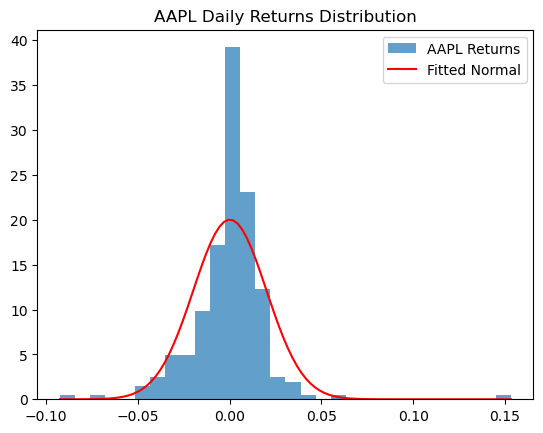

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Download AAPL data (1 year, daily)
aapl = yf.download('AAPL', start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)
# Calculate daily returns
aapl['Daily Return'] = aapl['Close'].pct_change().dropna()
# Stats
mean_return = aapl['Daily Return'].mean()
std_return = aapl['Daily Return'].std()
print(f"AAPL Mean Daily Return: {mean_return:.6f}, Std Dev: {std_return:.6f}")

# SciPy: Fit normal distribution to returns
returns = aapl['Daily Return'].dropna()
mu, sigma = stats.norm.fit(returns)
print(f"Fitted Normal - Mean: {mu:.6f}, Std Dev: {sigma:.6f}")

# Plot histogram with fitted curve
plt.hist(returns, bins=30, density=True, alpha=0.7, label="AAPL Returns")
x = np.linspace(min(returns), max(returns), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("AAPL Daily Returns Distribution")
plt.legend()
plt.show()

# Variance Notes
- Variance: Measures spread of data around mean.
- Formula: σ² = Σ(x_i - μ)² / N.
-  Used in quant finance to assess risk (e.g., stock volatility).

In [7]:
variance = aapl['Daily Return'].var()
print(f"AAPL Returns Variance: {variance:.6f}")

AAPL Returns Variance: 0.000399


In [9]:
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
    return []

# Test
nums = [2, 7, 11, 15]
target = 9
print(twoSum(nums, target)) # Should print [0, 1]

[0, 1]


# LeetCode: Two Sum
- Problem: Find indices of two numbers in array that sum to target.
- Solution: Use hash map for 0(n) time complexity.